####Step 1: Data Preprocessing
####Step 2: Data exploring and data visualization
####Step 3: Spliting the Data into Train and Test
####Step 4: Applying the alogrithm - Decision Tree and Random Forest
####Step 5: Using K-Fold cross validation
####Step 6: Finding accuracy, specificity 
####Step 7: ROC-AUC Curve
####Step 8: Comparing accuracy of LDA and QDA


Importing Libraries

In [1]:
#For Avoding the warning
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
#Upload file into google colab session
from google.colab import files
#Multidimensional array objects and a collection of routines for processing those arrays
import numpy as np
#For data analysis and data manipulation
import pandas as pd
#For 2D Graph
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
#For 3D Graph
import seaborn as sns
import plotly.express as px
from scipy import stats
#Spliting the data into train and test using sklearn library
from sklearn.model_selection import train_test_split 
#Feature scaling using the sklearn library
from sklearn.preprocessing import StandardScaler
#Fitting LDA to the training set  and testing set
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#Fitting QDA to the training set and testing set
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#Using metrics for confusion matrix, getting the accuracy score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
#Using k fold cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

Data Preprocessing

In [ ]:
#Uploading the file
file = files.upload() 
#Reading the csv File
Wine_Data = pd.read_csv("wine.csv") 
#Printing the top 5 rows from dataframe
Wine_Data.head()

Saving wine.csv to wine (3).csv


,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
#Getting how many rows and columns
Wine_Data.shape

(178, 14)

In [ ]:
#Getting the information of each feature
Wine_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
#Checking the null values
Wine_Data.isnull().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [ ]:
#Getting the Statistical Information
Wine_Data.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Data Exploring and data visualization

Getting the Count of Wine

In [ ]:
#Grouping the type of glass and taking the count
df = pd.DataFrame(Wine_Data.groupby(by = ['Wine']).size().reset_index(name = 'count'))
#Getting count of type of glass
fig = px.pie(df, values="count" , names ="Wine",color_discrete_sequence = px.colors.sequential.PuRd, template = "plotly_dark")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',title = 'Count of Wine')
fig.show()

Comparing the feature with the target variable

In [ ]:
x = Wine_Data.drop(columns="Wine")

In [ ]:
x.columns

Index(['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Flavanoids',
       'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue', 'OD', 'Proline'],
      dtype='object')

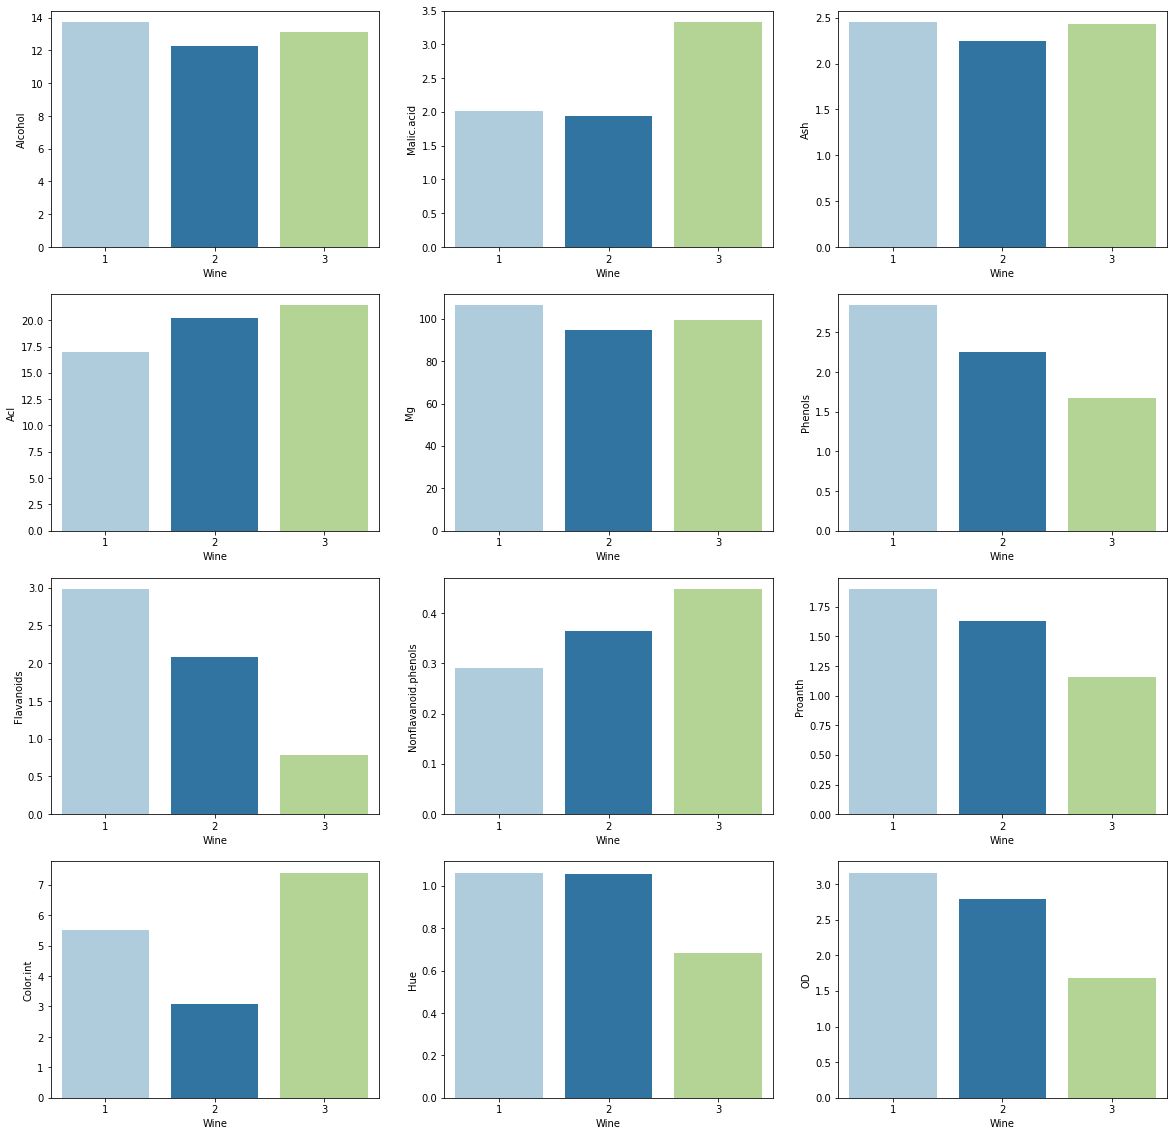

In [ ]:
# Set the color palette
sns.set_palette(sns.color_palette("Paired"))
fig, axs = plt.subplots(4,3, figsize=(20,20))
fig.patch.set_facecolor('white')
attributes = x.columns
att = 0
for i in range(4):
    for j in range(3):
        try:
            sns.barplot(x="Wine", y=attributes[att],  ci=None, data=Wine_Data, estimator=np.mean, ax=axs[i][j])
        except:
            print("Done")
        att += 1

Finding the Correlation between some of the feature

In [ ]:
df = Wine_Data.copy()

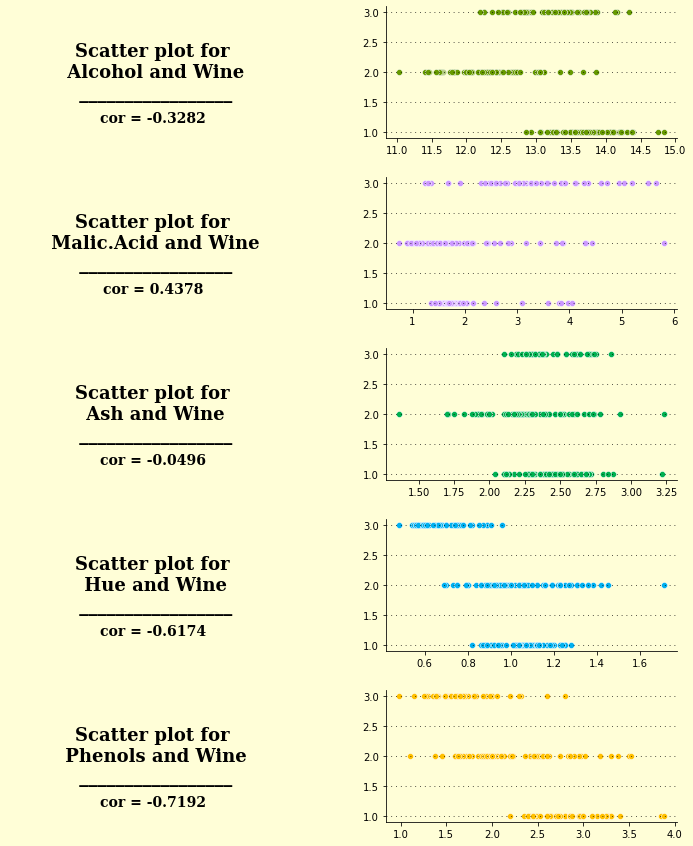

In [ ]:
background_color = '#FFFED7'
color_palette = ['#669900', '#CC99FF', '#00B050', '#00B0F0', '#FFC000', '#00FF00', '#002060', '#FF00FF', '#6600CC']
fig = plt.figure(figsize=(12, 15))
gs = fig.add_gridspec(5, 2)
gs.update(wspace=0.3, hspace=0.3)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])
ax6 = fig.add_subplot(gs[3, 0])
ax7 = fig.add_subplot(gs[3, 1])
ax8 = fig.add_subplot(gs[4, 0])
ax9 = fig.add_subplot(gs[4, 1])

axes = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]
fig.patch.set_facecolor(background_color)


# Alochol And Wine
cor = round(stats.pearsonr(df['Alcohol'], df['Wine'])[0], 4)
ax0.text(0.5, 0.5,
        'Scatter plot for\n Alcohol and Wine\n _________________',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontfamily='serif',
        fontweight='bold')
ax0.text(0.5, 0.15,
        'cor = ' + str(cor),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=14, fontfamily='serif',
        fontweight='bold')

ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.scatterplot(x='Alcohol', y='Wine', data=df, ax=ax1, color=color_palette[0])


# Malic.Acid and Wine
cor = round(stats.pearsonr(df['Malic.acid'], df['Wine'])[0], 4)
ax2.text(0.5, 0.5,
        'Scatter plot for\n Malic.Acid and Wine\n _________________',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontfamily='serif',
        fontweight='bold')
ax2.text(0.5, 0.15,
        'cor = ' + str(cor),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=14, fontfamily='serif',
        fontweight='bold')

ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.scatterplot(x='Malic.acid', y='Wine', data=df, ax=ax3, color=color_palette[1])


# Ash and Wine
cor = round(stats.pearsonr(df['Ash'], df['Wine'])[0], 4)
ax4.text(0.5, 0.5,
        'Scatter plot for\n Ash and Wine\n _________________',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontfamily='serif',
        fontweight='bold')
ax4.text(0.5, 0.15,
        'cor = ' + str(cor),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=14, fontfamily='serif',
        fontweight='bold')

ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.scatterplot(x='Ash', y='Wine', data=df, ax=ax5, color=color_palette[2])


# Hue and Wine
cor = round(stats.pearsonr(df['Hue'], df['Wine'])[0], 4)
ax6.text(0.5, 0.5,
        'Scatter plot for\n Hue and Wine\n _________________',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontfamily='serif',
        fontweight='bold')
ax6.text(0.5, 0.15,
        'cor = ' + str(cor),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=14, fontfamily='serif',
        fontweight='bold')

ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.scatterplot(x='Hue', y='Wine', data=df, ax=ax7, color=color_palette[3])


# Phenols and Wine
cor = round(stats.pearsonr(df['Phenols'], df['Wine'])[0], 4)
ax8.text(0.5, 0.5,
        'Scatter plot for\n Phenols and Wine\n _________________',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontfamily='serif',
        fontweight='bold')
ax8.text(0.5, 0.15,
        'cor = ' + str(cor),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=14, fontfamily='serif',
        fontweight='bold')

ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.scatterplot(x='Phenols', y='Wine', data=df, ax=ax9, color=color_palette[4])



for ax in axes:
    ax.set_facecolor(background_color)
    ax.set_xlabel('')
    ax.set_ylabel('')
    for s in ['top', 'right']:
        ax.spines[s].set_visible(False)

for ax in [ax0, ax2, ax4, ax6, ax8]:
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(left=False, bottom=False)
    for s in ['left', 'bottom']:
        ax.spines[s].set_visible(False)

Finding the outlier in each feature

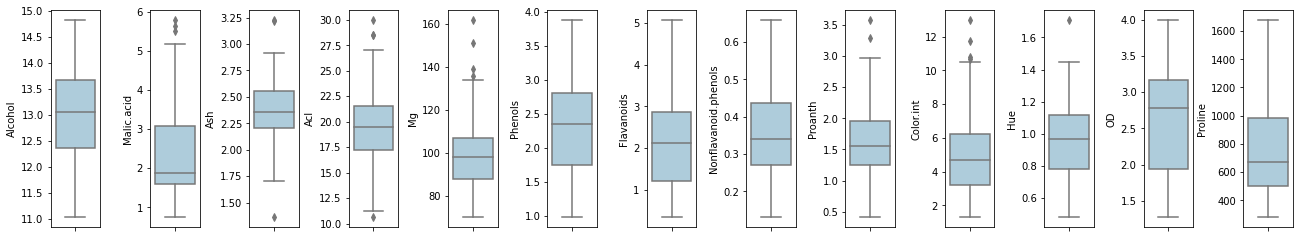

In [ ]:
data_to_plot = df.iloc[:, 1:]
fig, ax = plt.subplots(ncols=len(data_to_plot.columns))
plt.subplots_adjust(right=3, wspace=1)
for i, col in enumerate(data_to_plot.columns):
    sns.boxplot(y=data_to_plot[col], ax = ax[i])

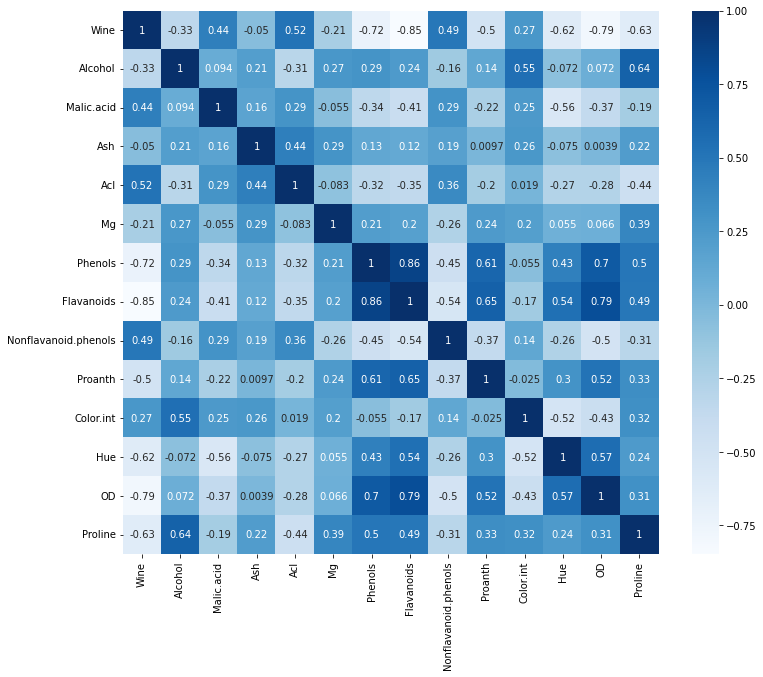

In [ ]:
#Seeing the correlation for each feature using the heatmap
fig, ax = plt.subplots(figsize=(12,10))
fig.patch.set_facecolor('white')
sns.heatmap(Wine_Data.corr(), ax=ax, annot=True, cmap="Blues")

Treating the outlier

In [ ]:
from scipy import stats
z = np.abs(stats.zscore(Wine_Data))
Wine_Data = Wine_Data[(z < 3).all(axis=1)]

In [ ]:
Wine_Data.shape

(168, 14)

Spliting the data into training and testing

In [ ]:
#Creating the variable x and y
x = Wine_Data.drop('Wine', axis=1)
y = Wine_Data['Wine']

NameError: ignored

In [ ]:
#split the data into train and test set
X_train, X_test, y_train, y_test= train_test_split(x, y,test_size = 0.3,shuffle = True,random_state = 0)  #shuffle the data to avoid bias
#printing the shape of x_train,x_test,y_train,y_test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(117, 13)
(117,)
(51, 13)
(51,)


In [ ]:
#Creating the variable for Standardscaler object
scaler = StandardScaler()
#Fit the model
scaler.fit(X_train)
#Making the transform for x train and x test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

Applying the Algorithm

Linear Discriminant Analysis

In [ ]:
#Creating the variable for Linear Discriminant Analysis object
lda = LinearDiscriminantAnalysis()
#Fit X_train and Y_train to the classifier
lda.fit(X_train, y_train)
#Making the prediction on X_test
y_pred = lda.predict(X_test)
#Making the prediction on X_train
y_pred1 = lda.predict(X_train)
#comparing actual response values (y_train with predicted response values (y_pred1)
LDA_Train =  metrics.accuracy_score(y_train, y_pred1)*100
print("Linear Discriminat Analysis model accuracy(in %) for Training:",LDA_Train)
#comparing actual response values (y_test) with predicted response values (y_pred)
LDA_Test = metrics.accuracy_score(y_test, y_pred)*100
print("Linear Discriminat Analysis  model accuracy(in %) for Testing:", LDA_Test)

Linear Discriminat Analysis model accuracy(in %) for Training: 100.0
Linear Discriminat Analysis  model accuracy(in %) for Testing: 100.0


Cross Validation with K-Fold

In [ ]:
#Split dataset into k consecutive folds (without shuffling by default)
#Creating the variable num_folds for how many no. of folds
num_folds = 5
#t maintains the same class ratio throughout the K folds as the ratio in the original dataset.
kfold=StratifiedKFold(n_splits = num_folds)
#Printing the results
results=cross_val_score(lda,X_train,y_train,cv = kfold)
lda_result = results.mean()*100
print("Cross Validation - Accuracy :" , lda_result)

Cross Validation - Accuracy : 98.29710144927537



Confusion Matrix, Classification Report For Linear Discriminat Analysis

In [ ]:
##Confusion Matrix is the number of correct and incorrect predictions made by a classifier
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Linear Discriminat Analysis :")
print(result)
#Getting the classification report
result1 = classification_report(y_test, y_pred)
print("Classification Report for Linear Discriminat Analysis :",)
print (result1)
#Overall accuracy
result2 = accuracy_score(y_test,y_pred)*100
print("Overall Accuracy For Linear Discriminat Analysis :",result2)

Confusion Matrix for Linear Discriminat Analysis :
[[17  0  0]
 [ 0 18  0]
 [ 0  0 16]]
Classification Report for Linear Discriminat Analysis :
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        16

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51

Overall Accuracy For Linear Discriminat Analysis : 100.0


Specificity and Sensitivity for LDA

In [ ]:
FP = result.sum(axis=0) - np.diag(result) 
FN = result.sum(axis=1) - np.diag(result)
TP = np.diag(result)
TN = result.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
total=sum(sum(result))
# Sensitivity, hit rate, recall, or true positive rate
TPR = ((TP/(TP+FN))).mean()*100
# Specificity or true negative rate
TNR = ((TN/(TN+FP))).mean()*100 

print('Sensitivity:' ,TPR)
print('Specificity: ' ,TNR)

Sensitivity: 100.0
Specificity:  100.0


ROC-AUC Curve For LDA

ROC-AUC for Class 1: 1.0
ROC-AUC for Class 2: 1.0
ROC-AUC for Class 3: 1.0


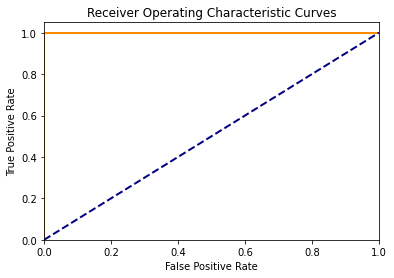

In [ ]:
#Binarize the output
y_test_bin = label_binarize(y_test, classes=[1, 2, 3])
n_classes = y_test_bin.shape[1]
#Calculate the y_score
y_score = lda.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
  plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
  print('ROC-AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show()

Quadratic Discriminat Analysis

In [ ]:
#Creating the variable for Quadratic Discriminatiant Analysis object
QDA = QuadraticDiscriminantAnalysis()
#Fit X_train and Y_train to the classifier
QDA.fit(X_train, y_train)
#Making the prediction on X_test
y_pred2 = QDA.predict(X_test)
#Making the prediction on X_train
y_pred3 = QDA.predict(X_train)
#comparing actual response values (y_train with predicted response values (y_pred1)
QDA_Train = metrics.accuracy_score(y_train, y_pred3)*100
print("Quadratic Discriminat Analysis model accuracy(in %) for Training:",QDA_Train)
#comparing actual response values (y_test) with predicted response values (y_pred)
QDA_Test = metrics.accuracy_score(y_test, y_pred2)*100
print("Quadratic Discriminat Analysis model accuracy(in %) for Testing:", QDA_Test)

Quadratic Discriminat Analysis model accuracy(in %) for Training: 100.0
Quadratic Discriminat Analysis model accuracy(in %) for Testing: 100.0


Cross Validation with K-Fold

In [ ]:
#Split dataset into k consecutive folds (without shuffling by default)
#Creating the variable num_folds for how many no. of folds
num_folds = 5
#t maintains the same class ratio throughout the K folds as the ratio in the original dataset.
kfold=StratifiedKFold(n_splits = num_folds)
#Printing the results
results=cross_val_score(QDA,X_train,y_train,cv = kfold)
QDA_result = results.mean()*100
print("Cross Validation - Accuracy :" , QDA_result)

Cross Validation - Accuracy : 98.26086956521738


Confusion Matrix, Classification Report For Quadratic Discriminat Analysis

In [ ]:
##Confusion Matrix is the number of correct and incorrect predictions made by a classifier
result3 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Quadratic Discriminat Analysis :")
print(result)
#Getting the classification report
result1 = classification_report(y_test, y_pred)
print("Classification Report for Quadratic Discriminat Analysis :",)
print (result1)
#Overall accuracy
result2 = accuracy_score(y_test,y_pred)*100
print("Overall Accuracy For Quadratic Discriminat Analysis :",result2)

Confusion Matrix for Quadratic Discriminat Analysis :
[[17  0  0]
 [ 0 18  0]
 [ 0  0 16]]
Classification Report for Quadratic Discriminat Analysis :
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        16

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51

Overall Accuracy For Quadratic Discriminat Analysis : 100.0


Specificity and Sensitivity for QDA

In [ ]:
FP = result3.sum(axis=0) - np.diag(result3) 
FN = result3.sum(axis=1) - np.diag(result3)
TP = np.diag(result3)
TN = result3.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
total=sum(sum(result3))
# Sensitivity, hit rate, recall, or true positive rate
TPR = ((TP/(TP+FN))).mean()*100
# Specificity or true negative rate
TNR = ((TN/(TN+FP))).mean()*100 

print('Sensitivity:' ,TPR)
print('Specificity: ' ,TNR)

Sensitivity: 100.0
Specificity:  100.0


ROC-AUC For QDA

ROC-AUC for Class 1: 1.0
ROC-AUC for Class 2: 1.0
ROC-AUC for Class 3: 1.0


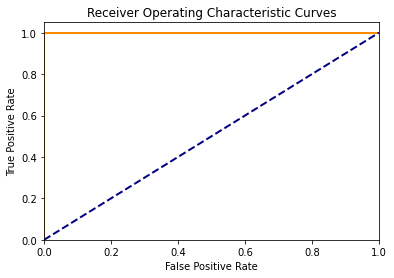

In [ ]:
#Binarize the output
y_test_bin = label_binarize(y_test, classes=[1, 2, 3])
n_classes = y_test_bin.shape[1]
#Calculate the y_score
y_score = QDA.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
  plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
  print('ROC-AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show()


Comparing the Models

In [ ]:
#Comparing the Model 
models =  [('Linear Discriminat Analysis', LDA_Train, LDA_Test),('Quadratic Discriminat Analysis' , QDA_Train, QDA_Test)]
predict = pd.DataFrame(data = models , columns =['Model', 'Training Accuracy', 'Testing Accuracy'])
predict

,Model,Training Accuracy,Testing Accuracy
0,Linear Discriminat Analysis,100.0,100.0
1,Quadratic Discriminat Analysis,100.0,100.0


In [ ]:
#Comparing the Model with Cross Validation
models1 =  [('Linear Discriminat Analysis with Cross Validation', lda_result),('Quadratic Discriminat Analysis Classification with Cross Validation' , QDA_result)]
predict1 = pd.DataFrame(data = models1 , columns =['Model', 'Accuracy'])
predict1

,Model,Accuracy
0,Linear Discriminat Analysis with Cross Validation,98.297101
1,Quadratic Discriminat Analysis Classification ...,98.260870
